# ResNet152

In [6]:
import tensorflow as tf
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.models import Sequential,Model,load_model
from tensorflow.python.client import device_lib
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras.applications import ResNet152




In [46]:
from keras_preprocessing.image import ImageDataGenerator
train_gendata = []
valid_gendata = []
test_gendata = []
train_datagen2 = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    validation_split = 0.2)
model_path = "E://CN240//model//model5-{epoch:02d}-{val_accuracy:.4f}.h5"


train_gen = train_datagen2.flow_from_directory(
directory='C://Users//Admin//Desktop//Newtrain',
target_size=(224, 224),
shuffle = True,
color_mode="rgb",
batch_size=4,
class_mode="categorical",
subset = 'training')
train_gendata.append(train_gen)
    
valid_gen = train_datagen2.flow_from_directory(
directory='C://Users//Admin//Desktop//Newtrain',
target_size=(224, 224),
color_mode="rgb",
batch_size=4,
class_mode="categorical",
subset='validation')
valid_gendata.append(valid_gen)
    
test_gen = train_datagen2.flow_from_directory(
directory='C://Users//Admin//Desktop//testdata',
target_size=(224, 224),
color_mode="rgb",
batch_size=1,
class_mode=None)
test_gendata.append(test_gen)
    

Found 8303 images belonging to 3 classes.
Found 2074 images belonging to 3 classes.
Found 1717 images belonging to 3 classes.


In [3]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
def get_callbacks(name_weights, patience_lr):
    mcp_save = ModelCheckpoint(name_weights, save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=patience_lr, verbose=1, epsilon=1e-4, mode='min')
    return [mcp_save, reduce_lr_loss]

In [4]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [8]:
model = ResNet152(weights='imagenet',
                    include_top=False,
                    input_shape=(224, 224, 3))

In [11]:
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Model,load_model,Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation


x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.55)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.55)(x)
predictions = Dense(3, activation= 'softmax')(x)
model_2 = Model(inputs = model.input, outputs = predictions)
model_2.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_2.summary()


In [52]:
batch_size = 4

    
#callbacks = get_callbacks(name_weights = name_weights, patience_lr=10)
    
generator = train_gendata[0]
    
valid = valid_gendata[0]
test = test_gendata[0]
filepath="E://CN240//model_from_fold//model5-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]
history = model_2.fit(
                generator,
                steps_per_epoch=generator.n/batch_size,
                epochs=30,
                validation_data=valid,
                validation_steps=valid.n/batch_size,
                shuffle=True,
                verbose=1,
                callbacks = callbacks_list)
    
model_2.evaluate_generator(generator=valid,steps=valid.n)
test_gendata[0].reset()
    
import json
from keras.models import model_from_json, load_model
with open('E://CN240//model//model5_architecture.json', 'w') as f:
    f.write(model_2.to_json())
print("Saved model to disk")

Epoch 1/30
2075/2075 [==============================] - 859s 401ms/step - loss: 1.0025 - accuracy: 0.5778 - val_loss: 2.0621 - val_accuracy: 0.6008

Epoch 00001: saving model to E://CN240//model_from_fold\model5-01-0.6008.h5
Epoch 2/30
2075/2075 [==============================] - 780s 376ms/step - loss: 0.8948 - accuracy: 0.6010 - val_loss: 3.3536 - val_accuracy: 0.6008

Epoch 00002: saving model to E://CN240//model_from_fold\model5-02-0.6008.h5
Epoch 3/30
2075/2075 [==============================] - 754s 363ms/step - loss: 0.8868 - accuracy: 0.6005 - val_loss: 1.3273 - val_accuracy: 0.6008

Epoch 00003: saving model to E://CN240//model_from_fold\model5-03-0.6008.h5
Epoch 4/30
2075/2075 [==============================] - 746s 359ms/step - loss: 0.8442 - accuracy: 0.5953 - val_loss: 1.3148 - val_accuracy: 0.3269

Epoch 00004: saving model to E://CN240//model_from_fold\model5-04-0.3269.h5
Epoch 5/30
2075/2075 [==============================] - 746s 359ms/step - loss: 0.8163 - accuracy: 0

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


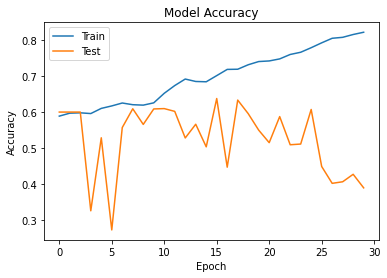

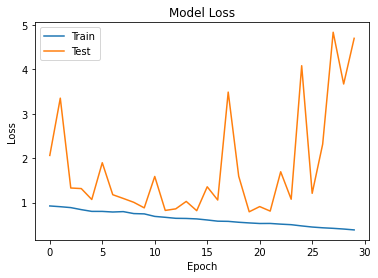

In [56]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from keras.models import load_model
#model = load_model('G://Deep Model//Densenet//model5-09-0.7936.hdf5')
model = tf.keras.models.load_model('E://CN240//model_from_fold//finalModel.h5')

# summarize model.
model.summary()

In [28]:
model_2.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
test_gendata[0].reset()
pred=model_2.predict_generator(test_gendata[0],
steps=test_gendata[0].n,
verbose=1)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1717/1717 [==============================] - 114s 65ms/step


In [59]:
ground_truth = test.classes
label2index = test.class_indices
label2index

{'Glaucoma': 0, 'Normal': 1, 'Others': 2}

In [60]:
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model_2.predict_generator(test_gendata[0],steps=1, verbose=0)
prob = model_2.predict(test_gendata[0])
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_gendata[0].n))

No of errors = 1/1717


<ipython-input-60-8fecfcbdb324>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  errors = np.where(predictions != ground_truth)[0]


In [61]:
predicted_class_indices=np.argmax(pred,axis=1)

In [62]:
predicted_class_indices

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [63]:
labels = (generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [64]:
y_test = generator.classes


In [65]:
y_test

array([0, 0, 0, ..., 2, 2, 2])

In [68]:
model_2.evaluate_generator(generator=generator,steps=test_gendata[0].n)


[0.35839739441871643, 0.8380897045135498]

In [58]:
model_2.save('E://CN240//model_from_fold//finalModelResNet.h5')

# Plotting Confusion Matrix

In [74]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                         title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")
  
  print(cm)
  
  thresh = cm.max() / 2.
  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
            horizontalalignment ="center",
            color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [70]:
x_labels = test.classes
type(x_labels)

numpy.ndarray

In [71]:
y_labels = predicted_class_indices
type(y_labels)


numpy.ndarray

In [42]:
 from sklearn.metrics import classification_report
print(classification_report(y_labels, x_labels))

              precision    recall  f1-score   support

           0       0.25      0.40      0.31       433
           1       0.29      0.28      0.29       517
           2       0.46      0.31      0.37       767

    accuracy                           0.32      1717
   macro avg       0.33      0.33      0.32      1717
weighted avg       0.36      0.32      0.33      1717



In [72]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
cm = confusion_matrix(x_labels, y_labels)

Confusion Matrix without normalization
[[285 269 150]
 [197 189 118]
 [213 180 116]]


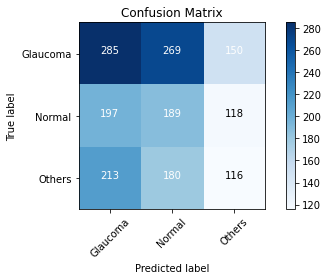

In [75]:
import itertools
cm_plot_labels = ['Glaucoma','Normal','Others']
plot_confusion_matrix(cm, cm_plot_labels, title ='Confusion Matrix')